<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/projects/fc_nn_for_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

датасет: MNIST

размер обучающей выборки:60000

размер тестирующей выборки: 10000

количество скрытых слоёв: 2

количество нейронов в скрытых слоя: 120

функция активации: сигмоида

функция потерь: кросс энтропия

оптимизатор: SGD lr=0.01, momentum = 0.9

размер батча: 1024

количество эпох: 200

In [1]:
import torch
import numpy as np
import torchvision.datasets
from tqdm import tqdm_notebook as bar

mnist_train = torchvision.datasets.MNIST('./', download = True, train = True)
mnist_test = torchvision.datasets.MNIST('./', download = True, train = False)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_data = mnist_train.data.float().reshape([-1, 28*28]).to(device)
train_labels = mnist_train.targets.to(device)
test_data = mnist_test.data.float().reshape([-1, 28*28]).to(device)
test_labels = mnist_test.targets.to(device)

class MNISTNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(MNISTNet, self).__init__()
    self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x

net = MNISTNet(120).to(device)

optimizer = torch.optim.SGD(net.parameters(), lr=0.01, momentum = 0.9)

loss = torch.nn.CrossEntropyLoss()

train_accuracy, test_accuracy, train_loss, test_loss = [], [] ,[] ,[]

batch_size = 1024

100%|██████████| 9912422/9912422 [00:00<00:00, 89244884.73it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 13492503.21it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 25606730.56it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7556734.93it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [2]:
for epoch in bar(range(200), desc = 'learning process'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index + batch_size]

    train_data_batch = train_data[batch_indexes].to(device)
    train_labels_batch = train_labels[batch_indexes].to(device)

    preds = net.forward(train_data_batch)

    loss_val = loss(preds, train_labels_batch)
    loss_val.backward()

    optimizer.step()

  train_preds = net.forward(train_data)
  test_preds = net.forward(test_data)

  train_accuracy.append((train_preds.argmax(dim = 1) == train_labels).float().mean().cpu().data)
  test_accuracy.append((test_preds.argmax(dim = 1) == test_labels).float().mean().cpu().data)

  train_loss.append(loss(train_preds, train_labels).item())
  test_loss.append(loss(test_preds, test_labels).item())

<ipython-input-2-af151c0310c7>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(200), desc = 'learning process'):


learning process:   0%|          | 0/200 [00:00<?, ?it/s]

In [8]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16.0, 6.0)

Text(0.5, 1.0, 'train and test accuracy')

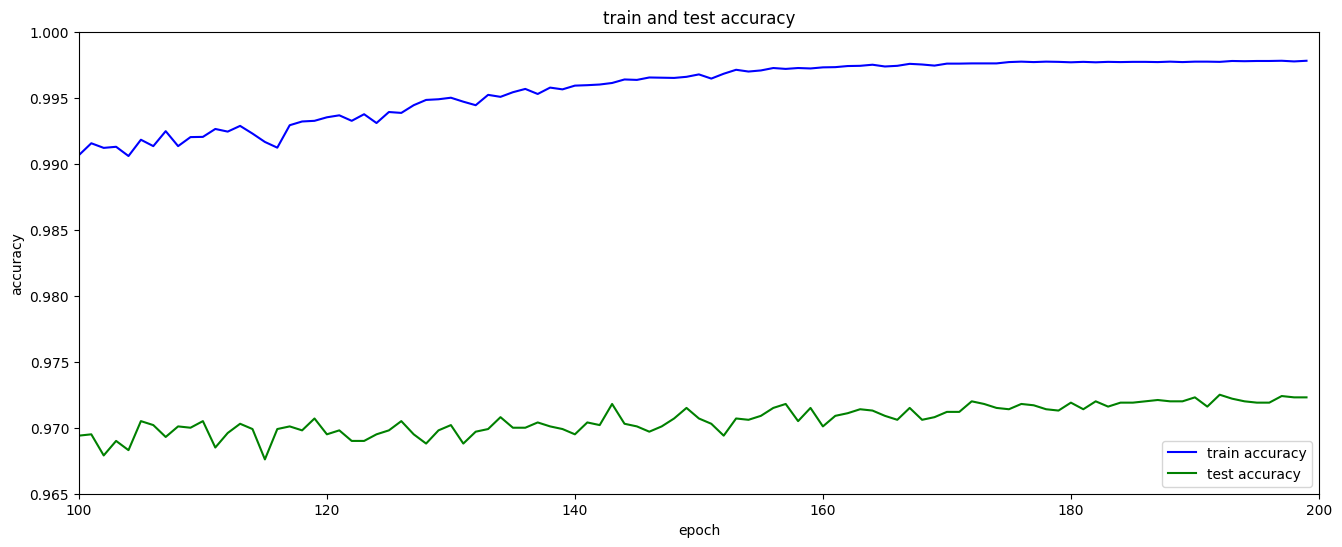

In [11]:
plt.plot(range(200), train_accuracy, c = 'blue', label = 'train accuracy')
plt.plot(range(200) , test_accuracy, c = 'green', label = 'test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(100,200)
plt.ylim(0.965, 1.0)
plt.legend(loc = 'lower right')
plt.title('train and test accuracy')

(0.0, 0.12)

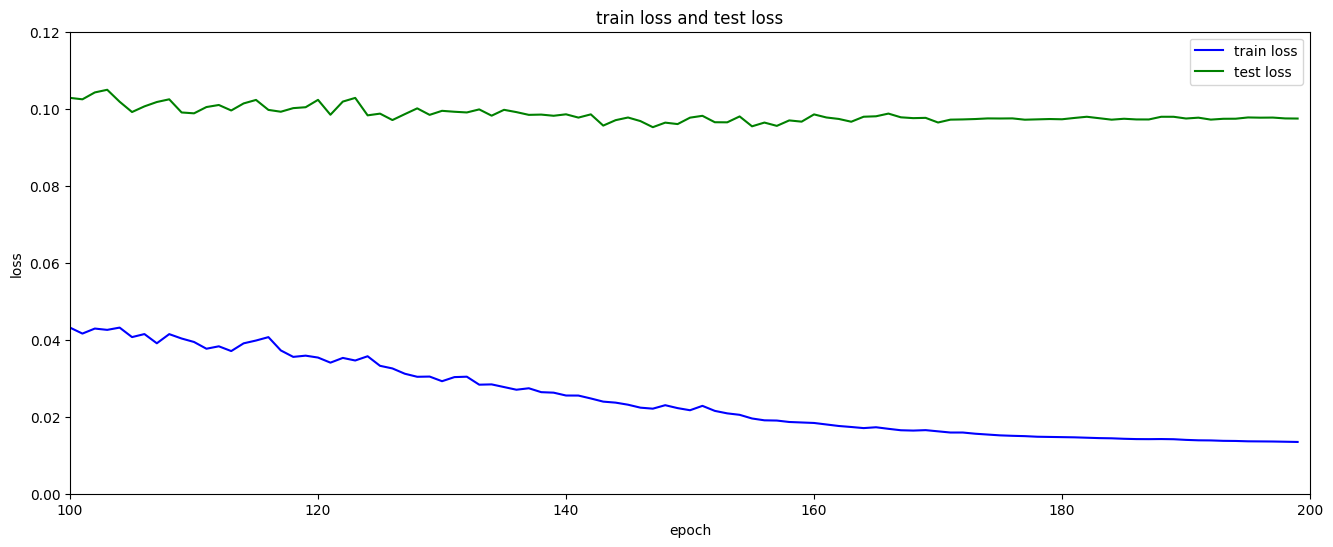

In [17]:
plt.plot(range(200), train_loss, c = 'blue', label = 'train loss')
plt.plot(range(200), test_loss, c = 'green', label = 'test loss')
plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('train loss and test loss')
plt.xlim(100, 200)
plt.ylim(0, 0.12)

In [22]:
print(test_accuracy[99], test_accuracy[199])

tensor(0.9680) tensor(0.9723)
